In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# Girdi değişkenlerini tanımlama
car_density = ctrl.Antecedent(np.arange(0, 11, 1), 'car_density')
traffic_flow = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic_flow')

In [3]:
# Çıktı değişkenini tanımlama
signal_duration = ctrl.Consequent(np.arange(0, 31, 1), 'signal_duration')

In [4]:
# Girdi değişkenleri için üyelik fonksiyonlarını tanımlama
car_density['low'] = fuzz.trimf(car_density.universe, [0, 0, 5])
car_density['medium'] = fuzz.trimf(car_density.universe, [0, 5, 10])
car_density['high'] = fuzz.trimf(car_density.universe, [5, 10, 10])

traffic_flow['low'] = fuzz.trimf(traffic_flow.universe, [0, 0, 5])
traffic_flow['medium'] = fuzz.trimf(traffic_flow.universe, [0, 5, 10])
traffic_flow['high'] = fuzz.trimf(traffic_flow.universe, [5, 10, 10])

# Çıktı değişkeni için üyelik fonksiyonlarını tanımlama
signal_duration['short'] = fuzz.trimf(signal_duration.universe, [0, 0, 10])
signal_duration['medium'] = fuzz.trimf(signal_duration.universe, [0, 10, 20])
signal_duration['long'] = fuzz.trimf(signal_duration.universe, [10, 20, 30])


In [5]:
# Kuralları tanımlama
rule1 = ctrl.Rule(car_density['low'] & traffic_flow['low'], signal_duration['short'])
rule2 = ctrl.Rule(car_density['low'] & traffic_flow['medium'], signal_duration['medium'])
rule3 = ctrl.Rule(car_density['low'] & traffic_flow['high'], signal_duration['long'])
rule4 = ctrl.Rule(car_density['medium'] & traffic_flow['low'], signal_duration['medium'])
rule5 = ctrl.Rule(car_density['medium'] & traffic_flow['medium'], signal_duration['medium'])
rule6 = ctrl.Rule(car_density['medium'] & traffic_flow['high'], signal_duration['long'])
rule7 = ctrl.Rule(car_density['high'] & traffic_flow['low'], signal_duration['long'])
rule8 = ctrl.Rule(car_density['high'] & traffic_flow['medium'], signal_duration['long'])
rule9 = ctrl.Rule(car_density['high'] & traffic_flow['high'], signal_duration['long'])


In [6]:
# Kontrol sistemi tanımlama
traffic_light_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
traffic_light = ctrl.ControlSystemSimulation(traffic_light_ctrl)

In [7]:
# Girdi değerlerini ayarlama
traffic_light.input['car_density'] = 7
traffic_light.input['traffic_flow'] = 3

In [8]:
# Çıktıyı hesaplama
traffic_light.compute()

In [9]:
# Çıktıyı yazdırma
print("Signal Duration:", traffic_light.output['signal_duration'])

Signal Duration: 14.193548387096772


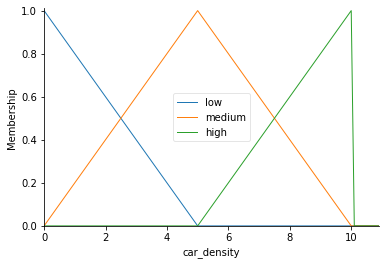

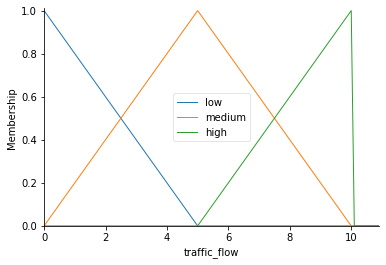

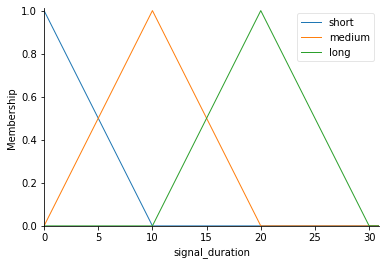

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz


# Girdi değişkenlerinin üyelik fonksiyonlarını çizdirme
car_density.view()
traffic_flow.view()

# Çıktı değişkeninin üyelik fonksiyonlarını çizdirme
signal_duration.view()

plt.show()
